In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw
from io import BytesIO
from IPython.core.interactiveshell import InteractiveShell
from IPython import display
from pathlib import Path
import glob
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})

## 初期値
v0: 初速度  
g: 重力加速度(地球)  
g1: 重力加速度(月)  
theta: 入射角度  

In [2]:
v0 = 10
g = 9.8
g1 = 9.8/6
theta = 30/180*np.pi

## 条件式

t_end: 物体が地面につく時間  
t: 物体が発射されてから地面に着くまでの時間を刻んだもの  
y: 高さ
x: 距離

In [3]:
t_end = 2*v0*np.sin(theta)/g1
t = np.arange(0., t_end, 0.1)

y = -g*t**2/2 + v0*t*np.sin(theta)
x = v0*t*np.cos(theta)

y1 = -g/6*t**2/2 + v0*t*np.sin(theta)
x1 = v0*t*np.cos(theta)

# デバッグ用
# print(y)
# print(x)

### 計算式

In [4]:
# 出力フォルダがなければ作成
dir = './datum/'
if not os.path.exists(dir):
    os.makedirs(dir)

# 書き出し
fp = open('./datum/data.txt','w')
for i in range(0,len(y),1):
    fp.write(str(round(t[i], 2))+'\t'+str(x[i])+'\t'+str(y[i])+'\t'+str(x1[i])+'\t'+str(y1[i])+'\n')
fp.close()

### 可視化

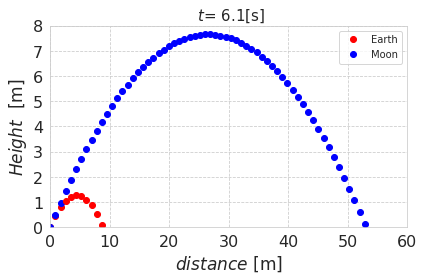

In [5]:
# 書き出したデータの読み込み
data = pd.read_csv('./datum/data.txt',delimiter='\t',encoding="UTF-8",
                 skiprows=1, 
                 names=['t','x','y','x1','y1'],
                 header=None)

# 出力フォルダがなければ作成
dir = './fig/'
if not os.path.exists(dir):
    os.makedirs(dir)

# 毎秒ごとにグラフ作成
plt.xlim(np.min(x1), math.ceil(np.max(x1) / 10) * 10)
plt.ylim(np.min(y1), math.ceil(np.max(y1)))

for index, i in enumerate(range(0,len(t),1)):
    if index == 0:
        plt.plot(x[i],y[i], 'o', color = "red", label = "Earth")
        plt.plot(x1[i],y1[i], 'o', color = "blue", label = "Moon")
        plt.legend(loc='upper right')
        plt.xlabel("$\it{distance}$ [m]", fontsize=17)
        plt.ylabel("$\it{Height}$  [m]", fontsize=17)
    else:
        plt.plot(x[i],y[i], 'o', color = "red")
        plt.plot(x1[i],y1[i], 'o', color = "blue")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(" $\it{t}$= "+str(round(t[i], 2))+ "[s]", fontsize=15)
    plt.tight_layout()
    plt.savefig("./fig/figure"+str(i).zfill(4)+".png")

## gifファイルの作成

In [15]:
# 以下のディレクトリの中に入っている画像を持ってきて、最初の画像に結合させることによりgifファイルが作成される
files = glob.glob("./fig/*")
files.sort()
img_list = []
for file in files:
    img = Image.open(file)
    img_list.append(img)
img_list[0].save('projectile_motion.gif',
               save_all=True, append_images=img_list[1:], optimize=False, duration=200, loop=0)

## gifファイルの再生

In [16]:
# gifファイルが再生されるように、設定を変更
InteractiveShell.ast_node_interactivity = "all"

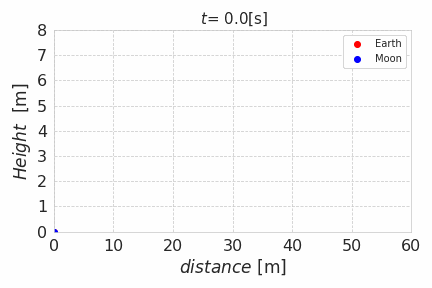

In [17]:
gifPath = Path("projectile_motion.gif")

with open(gifPath,'rb') as f:
  display.Image(data=f.read(), format='png')

In [14]:
# 他に影響が出るので、設定を元に戻す
InteractiveShell.ast_node_interactivity = 'last_expr'